In [39]:
#%matplotlib widget

In [40]:
import pandas as pd
import numpy as np
import nltk
import string
import regex as re
import contractions
from collections import Counter
import matplotlib.pyplot as plt

In [41]:
fake_news_df = pd.read_csv("clean_output.csv")
fake_news_df.head()

,Unnamed: 0,cleaned_title,cleaned_text,target
0,0,smell hillarys fear,daniel greenfield shillman journalism fellow f...,1
1,1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,1
2,2,kerry go paris gesture sympathy,yous secretary state john f kerry said monday ...,0
3,3,bernie supporters twitter erupt anger dnc trie...,kaydee king kaydeeking november 9 2016 lesson ...,1
4,4,battle new york primary matters,primary day new york frontrunners hillary clin...,0


In [42]:
fake_news_df.dropna(inplace=True)
fake_news_df.reset_index(drop=True, inplace=True)
fake_news_df.drop(columns='Unnamed: 0',inplace=True)

In [43]:
fake_news_df.dtypes

cleaned_title    object
cleaned_text     object
target            int64
dtype: object

In [44]:
len(fake_news_df)

6298

In [45]:
Counter(fake_news_df['cleaned_text'][0].split()).most_common(10)

[('fbi', 29),
 ('clinton', 16),
 ('hillary', 14),
 ('comey', 10),
 ('investigation', 7),
 ('campaign', 6),
 ('fear', 6),
 ('war', 5),
 ('people', 5),
 ('time', 5)]

In [46]:
real_word_list = []
fake_word_list = []
for i in range(0,len(fake_news_df)):
    if fake_news_df['target'][i] == 0:
        real_word_list.extend(fake_news_df['cleaned_text'][i].split())
    elif fake_news_df['target'][i] == 1:
        fake_word_list.extend(fake_news_df['cleaned_text'][i].split())

print(len(real_word_list))
print(len(fake_word_list))

1557345
1196044


In [47]:
real_count = Counter(real_word_list).most_common(15)
fake_count = Counter(fake_word_list).most_common(15)
print(real_count)
print(fake_count)

[('said', 17187), ('trump', 12693), ('would', 8994), ('clinton', 8769), ('one', 6314), ('people', 6156), ('new', 5772), ('president', 5684), ('state', 5569), ('campaign', 5374), ('also', 5028), ('republican', 4857), ('obama', 4663), ('states', 4325), ('could', 4316)]
[('trump', 5731), ('clinton', 5653), ('would', 5519), ('us', 5207), ('people', 5201), ('one', 4893), ('hillary', 4149), ('said', 3992), ('new', 3496), ('like', 3220), ('also', 3189), ('election', 2986), ('even', 2896), ('world', 2860), ('time', 2848)]


In [48]:
real_x = []
real_y = []
fake_x = []
fake_y = []
for i in range(0,len(real_count)):
    real_x.append(real_count[i][0])
    real_y.append(real_count[i][1])
for i in range(0,len(fake_count)):
    fake_x.append(fake_count[i][0])
    fake_y.append(fake_count[i][1])

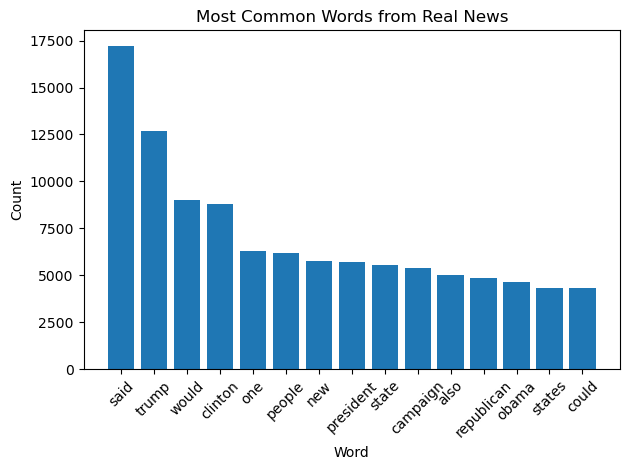

In [49]:
plt.bar(real_x, real_y, align="center")
plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common Words from Real News')
plt.tight_layout()
plt.savefig('real_news_word_count.png')

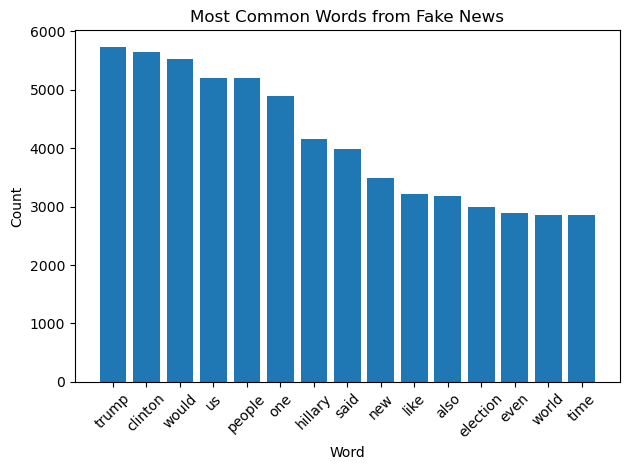

In [50]:
plt.bar(fake_x, fake_y, align="center")
plt.xticks(rotation=45)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Most Common Words from Fake News')
plt.tight_layout()
plt.savefig('fake_news_word_count.png')